In [1]:
from pandas import DataFrame
from pandas import read_csv
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from matplotlib import pyplot
from sklearn.metrics import mean_absolute_error
from scipy.stats import spearmanr

from sklearn.preprocessing import StandardScaler

/home/sudaraka/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
dataset = read_csv('with_timestamp.csv', header=0, index_col=0)
dataset.drop("@timestamp", axis=1, inplace=True)
dataset.head()

,system.cpu.idle.pct,system.cpu.iowait.pct,system.cpu.softirq.pct,system.cpu.system.pct,system.cpu.total.pct,system.cpu.user.pct,system.diskio_sda.iostat.await,system.diskio_sda.iostat.busy,system.diskio_sda.iostat.queue.avg_size,system.diskio_sda.iostat.read.request.merges_per_sec,...,system.load.1,system.load.15,system.load.5,system.load.norm.1,system.load.norm.15,system.load.norm.5,system.memory.actual.used.pct,system.memory.swap.used.pct,system.memory.used.pct,anomaly
0,3.5818,0.0474,0.0312,0.1058,0.4182,0.2338,0.698,12.601,0.165,0.0,...,0.68,0.97,1.00,0.170,0.243,0.250,0.6904,0.0,0.9620,0
1,3.5080,0.0934,0.0271,0.1054,0.4920,0.2661,0.572,11.104,0.137,0.0,...,0.58,0.96,0.97,0.145,0.240,0.243,0.6903,0.0,0.9626,0
2,3.5337,0.1136,0.0291,0.1025,0.4663,0.2211,0.572,11.104,0.137,0.0,...,0.65,0.96,0.97,0.163,0.240,0.243,0.6904,0.0,0.9628,0
3,3.5742,0.0503,0.0201,0.0916,0.4258,0.2637,0.572,11.104,0.137,0.0,...,0.68,0.95,0.95,0.170,0.238,0.238,0.6903,0.0,0.9635,0
4,3.5454,0.0705,0.0268,0.1051,0.4546,0.2522,0.572,11.104,0.137,0.0,...,0.68,0.95,0.95,0.170,0.238,0.238,0.6905,0.0,0.9638,0


## Normalizing Data

In [3]:
dataset[dataset.columns] = StandardScaler().fit_transform(dataset)

## Measure Correlation
Using Spearman's correlation

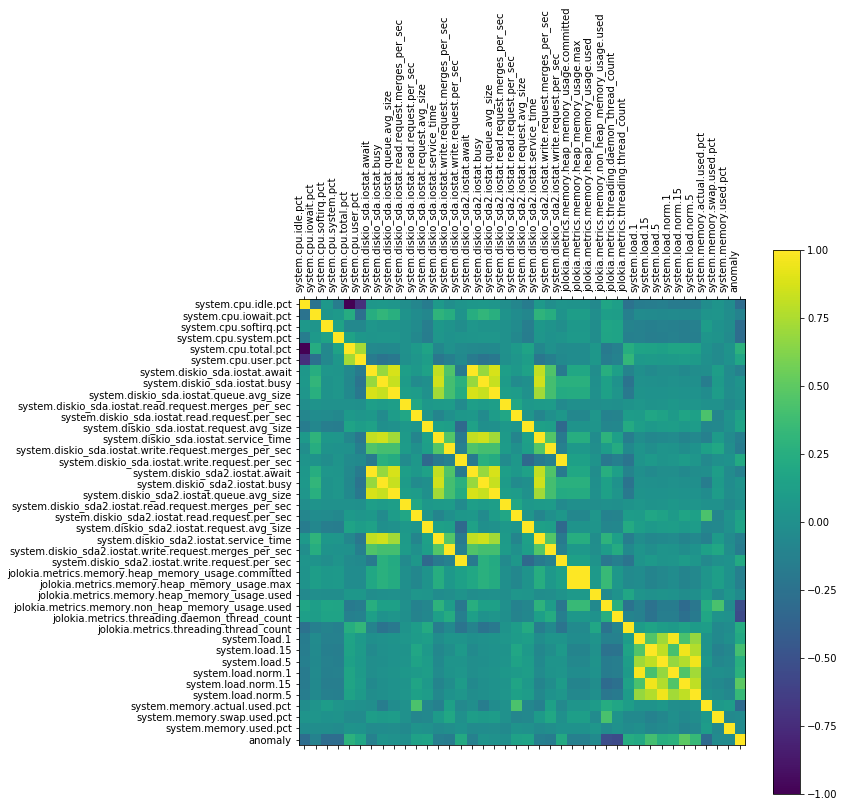

In [15]:
def plot_corr(df,size=10):
    '''Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot'''

    corr = df.corr(method="spearman")
    fig, ax = pyplot.subplots(figsize=(size, size))
    cax = ax.matshow(corr)
    fig.colorbar(cax)
    pyplot.xticks(range(len(corr.columns)), corr.columns);
    pyplot.yticks(range(len(corr.columns)), corr.columns);
    pyplot.setp(ax.get_xticklabels(), rotation=90, horizontalalignment='right') #Rotate lables
    pyplot.savefig('destination_path.pdf', format='pdf', dpi=1000)

plot_corr(dataset)